<hr style="border: solid 1px red; margin-bottom: 2% ">

## ARCHER2 SCIENTIFIC PYTHON COURSE

# Parallel Processing with Dask
<hr style="border: solid 1px red; margin-bottom: -1%; ">

## Website:  http://www.archer2.ac.uk 

## Helpdesk: support@archer2.ac.uk

<br>

<img src="../images/ukri_logo.png" style="float: center">
<br>
<img src="../images/hpe_logo.png" style="float: center">
<br>
<img src="../images/epcc_logo.png" style="float: center">
<br>
<img src="../images/archer2_logo.png" style="float: center">

<br>

<img src="../images/reusematerial.png" width="50%">

<br>
<hr class="top">

## Dask

<hr class="bot">
<br>

Dask is a framework for providing parallel functionality for Python, aimed at data analytics operations.

* Can scale from threads up to large numbers of processes
* Can integrate with batch systems
* Provides interfaces to common data analytics libraries
* Has support for monitoring and profiling etc...

https://dask.org/ 


<br>
<hr class="top">

## General

<hr class="bot">
<br>

Two main components for Dask
* Data collections/types
* Task scheduling functionality with parallel backends

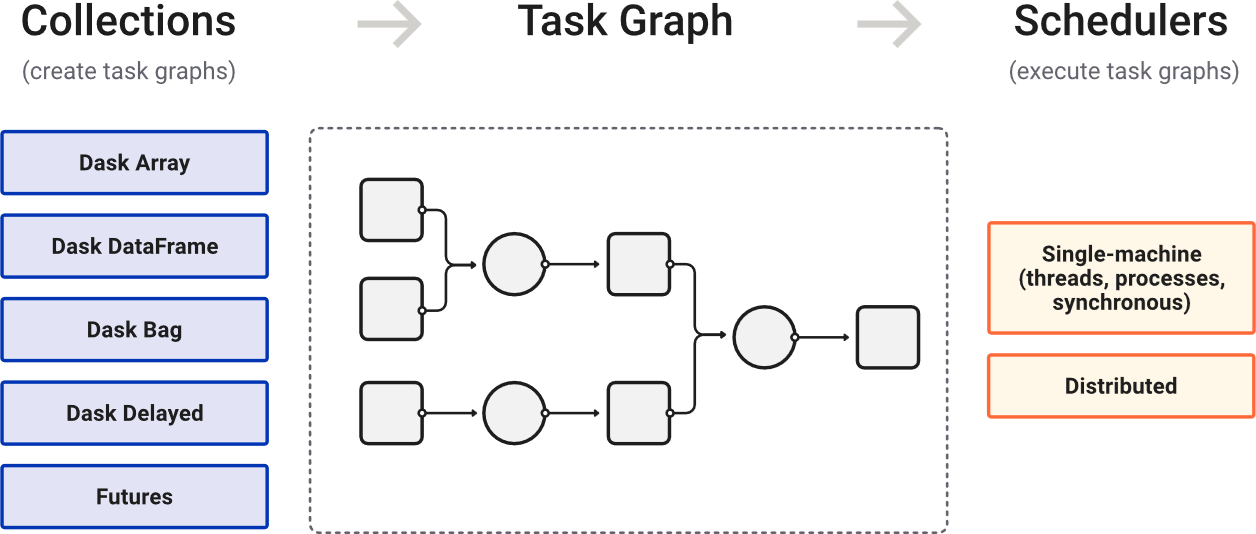

General approach is:
* split work to be done or data strutures into tasks
* schedule tasks on compute resources
* execute those tasks

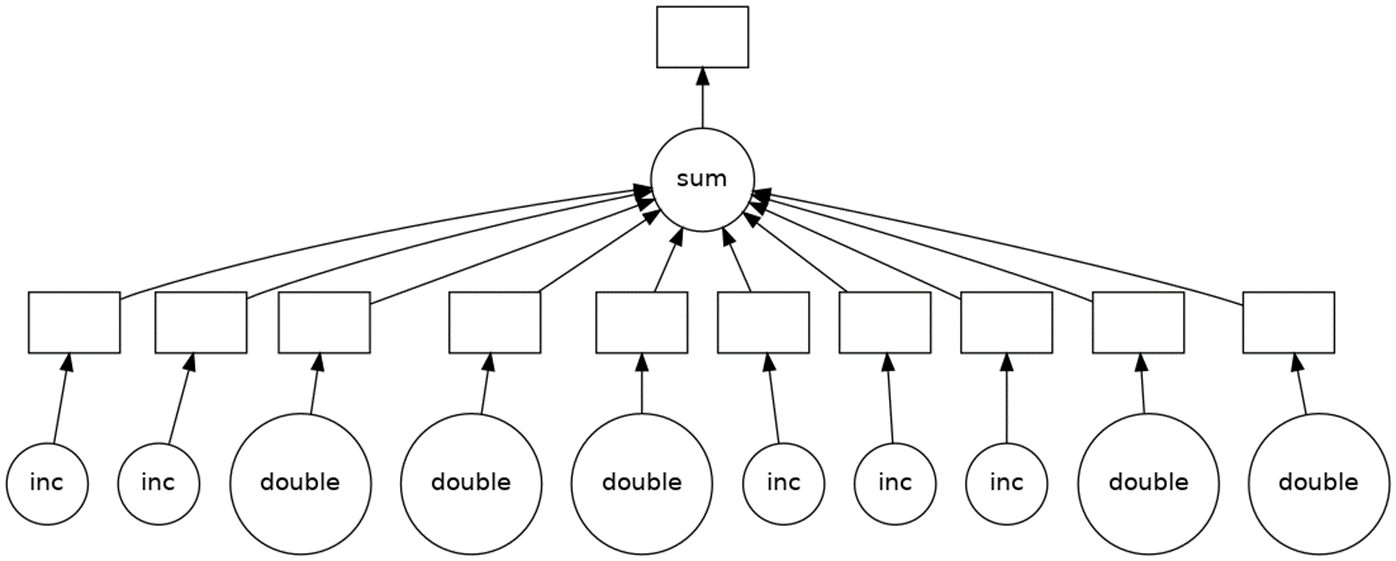



<br>
<hr class="top">

## Data Collections

<hr class="bot">
<br>

Dask has three main data collection types:

* Array
  * n-dimensional array (similar to numpy arrays)
  * Out-of-memory functionality
* DataFrame
  * pandas DataFrame functionality
  * 2-d table/spreadsheet
* Bag
  * Unstructured data types
  * Python iterators

Dask functionality allows all of these to be distributed across compute nodes but still processed as if local



<br>
<hr class="top">

## Direct Parallelisation

<hr class="bot">
<br>

* `dask.delayed` interface
  * Construct custom parallelization
  * Dask task graph functions
* dask `Futures` functionality
  * Enable immediate task generation
  * Sidesteps delayed evaluation
* Data movement functions
  * `gather`, `scatter`, or realise data from futures 
* Coordination/synchronisation functionality
  * Queues, Variables, Locks, etc…

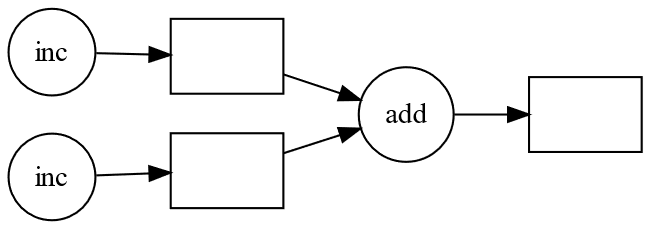

<br>
<hr class="top">

## Dask Array

<hr class="bot">
<br>

Dask Array mimics NumPy arrays, or xArrays (given it can support out of memory data structures)

Arrays are created as normal, but a chunk size specified to define how to split data into tasks

Many ways to create arrays
* Random
  * `random.binomial(n, p[, size, chunks])`
  * `random.normal([loc, scale, size, chunks])`
  * `random.poisson([lam, size, chunks])`
  * `random.random([size, chunks])`

https://docs.dask.org/en/stable/array-api.html#random

In [ ]:
import dask.array as da
x = da.random.random((10000, 10000), chunks=(1000, 1000))
print(x)
x.compute()

* numpy arrays
  *  Input must have a .shape, .ndim, .dtype and support numpy-style slicing
 
https://docs.dask.org/en/stable/generated/dask.array.from_array.html#dask.array.from_array 

dask.array<array, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>
49996818.781544164


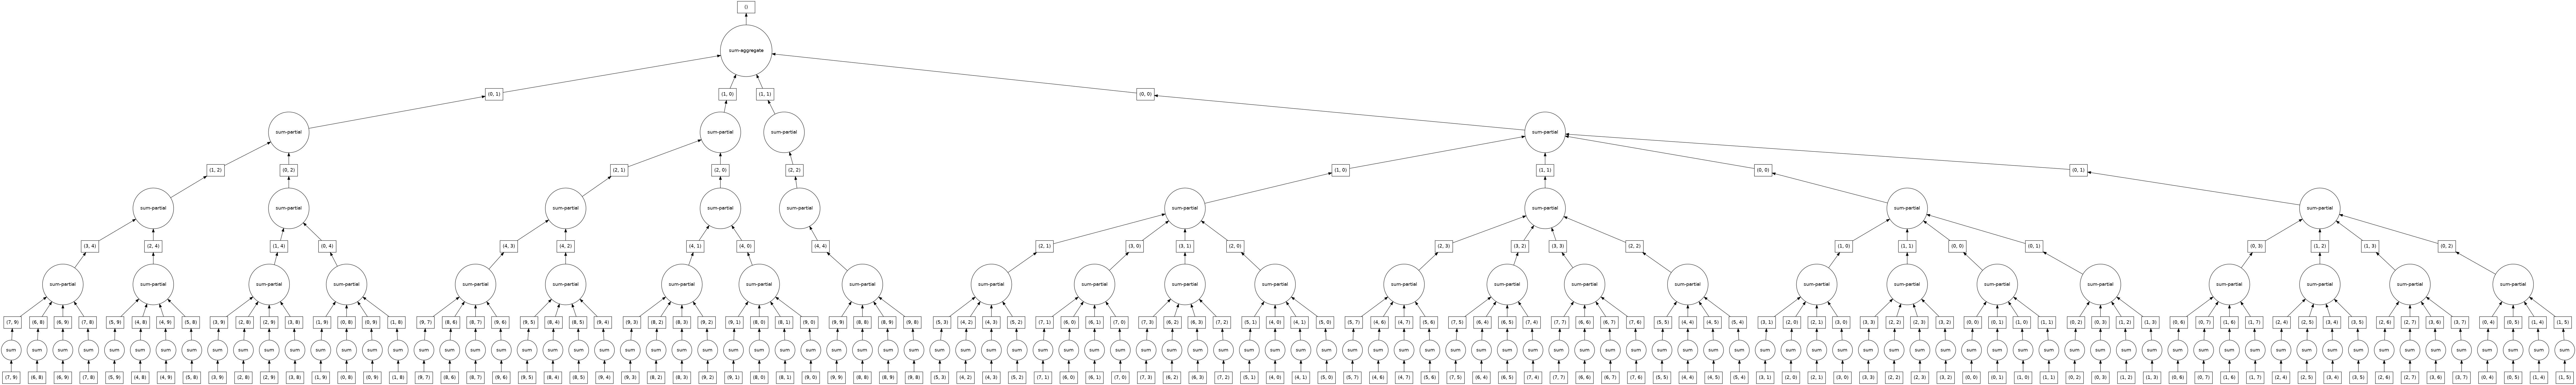

In [54]:
import numpy as np
np_array = np.random.random((10000, 10000))
x = da.from_array(np_array, chunks=(1000, 1000))
print(x)
my_sum = x.sum().compute()
print(my_sum)
x.sum().visualize()

In [ ]:
import dask.array as da
x = da.random.random((10000, 10000), chunks=(1000, 1000))
y = da.random.random((10000, 10000), chunks=(1000, 1000))
#mean = x.mean().compute()
#print(mean)
z = x*y

In [ ]:
z.dask

In [ ]:
z.visualize()

 * From files
   * .npy are numpy binary files
   * .zarr are binary files designed for blocked/chunked and compressed data
   * Load groups of files into a single array
   
`dask.array.from_npy_stack(dirname, mmap_mode='r’)`

`dask.array.from_zarr(url, component=None, storage_options=None, chunks=None, name=None, inline_array=False, **kwargs)`

 * From dask arrays
   * concatenate: create single dimension array from existing arrays
   * stack: create new dimension of data with existing arrays
 * delayed
   * From delayed functions that return things that dask arrays can be constructed from

*  Remember, tasking means everything is lazy


Dask supports a range of numpy like functionality:
 * Arithmetic and scalar mathematics: +, *, exp, log, ...
 * Reductions along axes: sum(), mean(), std(), sum(axis=0), ...
 * Tensor contractions / dot products / matrix multiply: tensordot
 * Axis reordering / transpose: transpose
 * Slicing: x[:100, 500:100:-2]
 * Indexing along single axes with lists or NumPy arrays: x[:, [10, 1, 5]]
 * Array protocols like __array__ and __array_ufunc__
 * Some linear algebra: svd, qr, solve, solve_triangular, lstsq

Dask Array lacks the following features:
 * Much of np.linalg has not been implemented
 * Arrays with unknown shapes do not support all operations
 * Sorts are not fully supported
 * tolist 
 * Iterators can be inefficent
 
Full API is at: https://docs.dask.org/en/stable/array-api.html 

<br>
<hr class="top">

## Dask DataFrame

<hr class="bot">
<br>

Mimics pandas data frame datatype. There are a range of ways to create dataframes:

https://docs.dask.org/en/stable/dataframe-create.html# 
 * From files/data sources
   * read_csv(urlpath[, blocksize, ...])
   * read_parquet(path[, columns, filters, ...])
   * read_hdf(pattern, key[, start, stop, ...])	
   * read_orc(path[, engine, columns, index, ...]	
   * read_json(url_path[, orient, lines, ...])	
   * read_sql_table(table_name, con, index_col..)	
   * read_sql_query(sql, con, index_col[, ...])	
   * read_sql(sql, con, index_col, **kwargs)	
   * read_table(urlpath[, blocksize, ...])	
   * read_fwf(urlpath[, blocksize, ...])	
   
https://docs.dask.org/en/stable/array-api.html#random

 * From dask objects
   * from_delayed(dfs[, meta, divisions, prefix, ...])
   * from_dask_array(x[, columns, index, meta])
   * dask.bag.core.Bag.to_dataframe([meta, ...]

* From other objects
  * from_bcolz(x[, chunksize, categorize, ...])
  * from_array(x[, chunksize, columns, meta])

In [ ]:
import dask.dataframe as dd
df = dd.read_csv('surveys.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.weight.max().visualize()
#df.weight.max()

Can also specify blocksize (chunks)

`dask.dataframe.read_csv(urlpath, blocksize='default', lineterminator=None, compression='infer', sample=256000, sample_rows=10, enforce=False, assume_missing=False, storage_options=None, include_path_column=False, **kwargs)`

In [ ]:
df = dd.read_csv('surveys.csv', blocksize="10000")
#df.weight.max().visualize()
#df.weight.max().compute()

* DataFrames cover part of the pandas API:
  * Independent operations:
   * Element-wise operations: df.x + df.y, df * df
   * Row-wise selections: df[df.x > 0]
   * Loc: df.loc[4.0:10.5]
   * Common aggregations: df.x.max(), df.max()
   * Is in: df[df.x.isin([1, 2, 3])]
   * Date time/string accessors: df.timestamp.month
* Group operations:
   * groupby-aggregate (with common aggregations): df.groupby(df.x).y.max(), df.groupby('x').max()
   * groupby-apply on index: df.groupby(['idx', 'x']).apply(myfunc), where idx is the index level name
   * value_counts: df.x.value_counts()
   * Drop duplicates: df.x.drop_duplicates()
   * Join on index: dd.merge(df1, df2, left_index=True, right_index=True)
   * Join with Pandas DataFrames: dd.merge(df1, df2, on='id')
* Element-wise operations with different partitions / divisions: df1.x + df2.y
   * Date time resampling: df.resample(...)
   * Rolling averages: df.rolling(...)
   * Pearson’s correlation: df[['col1', 'col2']].corr()
* Group operations requiring data reordering
   * Set index: df.set_index(df.x)
   * groupby-apply not on index (with anything): df.groupby(df.x).apply(myfunc)
   * Join not on the index: dd.merge(df1, df2, on='name')

In [ ]:
grouped_data = df.groupby('sex')
grouped_data.weight.mean().compute()

In [ ]:
grouped_data.mean().compute()

<br>
<hr class="top">

## Dask Bag

<hr class="bot">
<br>

Bag is like a list or set (python sequence), an unordered collection of data with repeats, i.e. `{1, 2, 2, 3}`. Bags are immutable like python `tuples`, and are useful to parallelise simple Python operations, particularly with unstructured or semi-structured data, i.e. text data, log files, JSON records, or user defined Python objects. Parallelising large Python lists would be an example. Bags are parallelised with processes by default, to bypass Python GIL issues, although this means inter-communication between Bag workers can be slow.

Dask Bag provides operations such as:
 * map
 * groupby
 * filter
 * fold
 * etc...

The full API is here https://docs.dask.org/en/latest/bag-api.html 

Bags are generally slower than Arrays and DataFrames, so should only be used when required.

Dask provides different modesl for creating bags:

* `from_sequence(seq[, partition_size, npartitions])`
* `from_delayed(values)`
* `from_url(urls)`
* `range(n, npartitions)`
* `read_text(urlpath[, blocksize, compression, ...])`
* `read_avro(urlpath[, blocksize, ...])`
* `DataFrame.to_bag([index, format])`

In [ ]:
import dask.bag as db
from operator import add
b = db.from_sequence([1, 2, 3, 4, 5], npartitions=2)
print(b.compute())

Dask bags support the following operations:

* `Bag.accumulate(binop[, initial])`
* `Bag.all(split_every=None)`
* `Bag.any(split_every=None)`
* `Bag.count([split_every])`
* `Bag.max([split_every])`
* `Bag.min([split_every])`
* `Bag.msum([split_every])`

In [ ]:
print(b.accumulate(add).compute())

bool_bag = db.from_sequence([True, True, False])
print(bool_bag.all().compute())

Also supports data operations:

* `Bag.reduction(perpartition, aggregate[, ...])`
* `Bag.random_sample(prob, random_state=None)`
* `Bag.filter(predicate)`
* `Bag.groupby(grouper[, method, npartitions, ...])`
* `Bag.foldby(key, binop[, initial, combine, ...])` (combined reduction and groupby that can give improved performance)

In [ ]:
def iseven(x):
    return x % 2 == 0
b = db.from_sequence(range(5))
print(list(b.filter(iseven)))

b = db.from_sequence(range(10))
iseven = lambda x: x % 2 == 0
print(dict(b.groupby(iseven))) 

<br>
<hr class="top">

## Dask Delayed

<hr class="bot">
<br>

`dask.Delayed` provides functionality for direct task graph creation, using python functions or operations as the tasks in the graph.

The main function that can be used is `dask.delayed(func)(inputs…)`, but you can also use code annotation/decoration `@dask.delayed`.

As with the other Dask functionality, a `.compute()` call is require to actually run the computations.

Note: With the `delayed` function, the position of the brackets is important:
* `dask.delayed(f(x, y))`: This immediately computes `f` and then creates a delayed output
* `dask.delayed(f)(x, y)`: This creates a lazy/delayed function that will be evaluated later

In [ ]:
def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = sum(output)
print(total)

<br>

#### Exercise

Convert the code below into Dask delayed code and compute the result:

In [ ]:
def inc(x):
    return x + 1

def double(x):
    return x * 2

def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = sum(output)
print(total)


#### Solutions

In [ ]:
# Uncomment and execute this cell to see a solution using dask functions to delay this computation
#%load delayed_functions.py


In [ ]:
# Uncomment and execute this cell to see a solution using dask decorators to delay this computation
#%load ./delayed_decorator.py

<br>
<hr class="top">

## Dask Futures

<hr class="bot">
<br>

Futures provide more complex functionality to build arbitrary task graphs. This is similar to delayed but tasks can execute as soon as they are available, rather than waiting for a compute to start the task graph.

You can create tasks using these functions:
* `Client.submit(func, *args[, key, workers, ...])`
* `Client.map(func, *iterables[, key, workers, ...])`
* `Future.result([timeout])`

There are also functions to move data:
* `Client.gather(futures[, errors, direct, ...])`
* `Client.scatter(data[, workers, broadcast, ...])`



In [ ]:
from dask.distributed import Client
client = Client()  # start local workers as processes
# or
#client = Client(processes=False)  # start local workers as threads
def inc(x):
    return x + 1

def add(x, y):
    return x + y

a = client.submit(inc, 10)
b = client.submit(inc, 20)
c = client.submit(add, a, b) 
c.result()

In [ ]:
futures = client.map(inc, range(1000))
results = client.gather(futures)
print(results)


<br>
<hr class="top">

## Dask Scheduling and runtime configuration

<hr class="bot">
<br>

Dask uses threading as the standard mechanism on single nodes for Arrays, DataFrames, and `delayed`, with processes used for Bags and Futures (by default). It is possible to modify the default execution mechanism on a:

* Per run basis:
    * `x.sum().compute(scheduler='processes’)`
* As a context:
    * with dask.config.set(scheduler='threads'):
            x.compute
* Or globally:
    * `dask.config.set(scheduler='threads’)`
                           
It is also possible to manually specify the number of workers to use (by default Dask will use all the available cores):
```
from multiprocessing.pool import ThreadPool
dask.config.set(pool=ThreadPool(8))
```


dask.array<array, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>
49998516.25100235


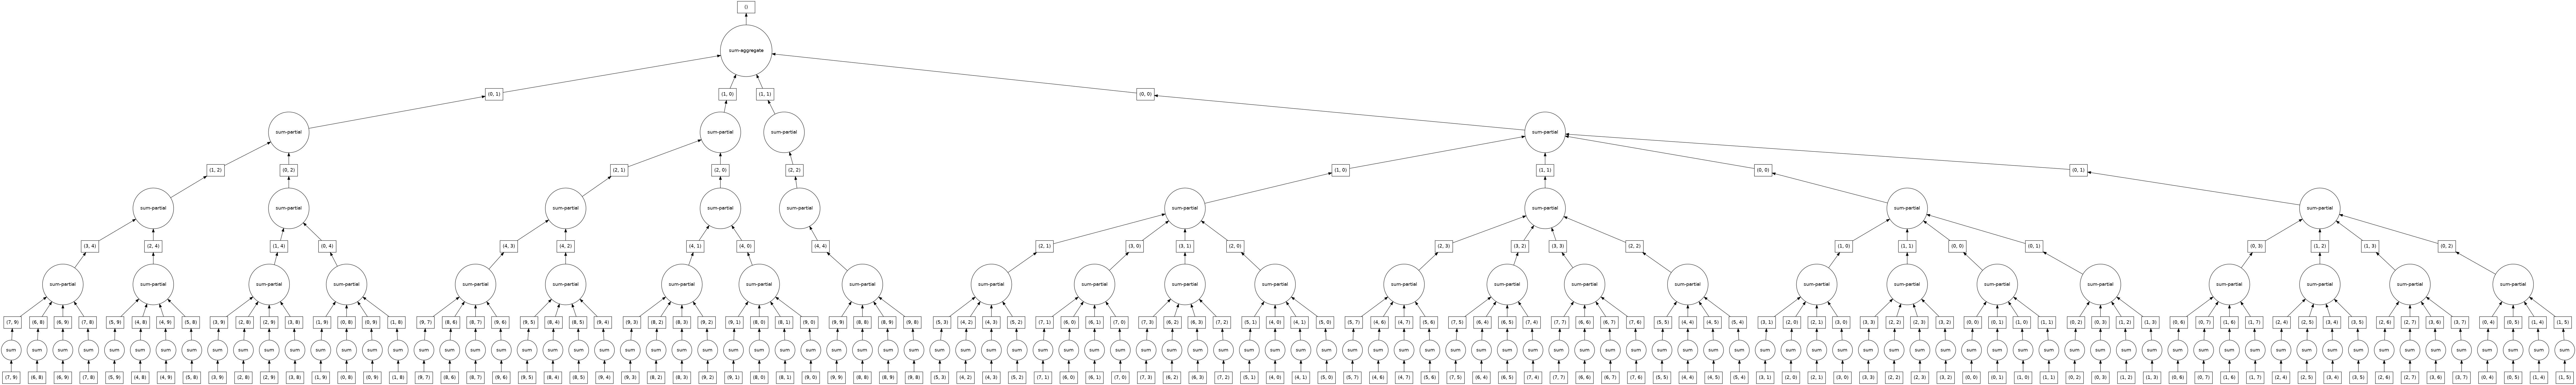

In [53]:
import numpy as np
from multiprocessing.pool import ThreadPool
dask.config.set(pool=ThreadPool(4))

np_array = np.random.random((10000, 10000))
x = da.from_array(np_array, chunks=(1000, 1000))
print(x)
my_sum = x.sum().compute()
print(my_sum)

The distributed scheduler provides functionality to work beyond a single node and also more functional task options on a single node.

You may need to install the `distributed` dask package separately (i.e. conda install or pip install of dask distributed).

It can then be used by importing the `Client` and configuring a specific `Client` to use:

```
from dask.distributed import Client
client = Client(...)
df.x.sum().compute()
```

If only want to run on a single node, then the `LocalCluster` option is sufficient:



dask_mpi provides MPI launch interfacing
from dask_mpi import 
initialize
initialize()
from dask.distributed import Client
Client = Client()
mpirun -np 4 python my_client_script.py
Or
mpirun -np 4 dask-mpi --scheduler-file ~/dask-scheduler.json
from dask.distributed import Client
client = Client(scheduler_file='~/dask-scheduler.json’)
client = Client(processes=False, n_workers=4)

In [ ]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
df.x.sum().compute()

`dask_jobqueue` provides batch system interfaces (again this may need to be installed separately).
    
Job Queue provides a range of different batch system integration functions:

* `HTCondorCluster([n_workers, loop, security, ...])`
* `LSFCluster([n_workers, loop, security, ...])`
* `MoabCluster([n_workers, loop, security, ...])`
* `OARCluster([n_workers, loop, security, ...])`
* `PBSCluster([n_workers, loop, security, ...])`
* `SGECluster([n_workers, loop, security, ...])`
* `SLURMCluster([n_workers, loop, security, ...])`

An example of using this with Slurm on ARCHER2 follows:

```
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(cores=128, 
                       processes=128,
                       memory='256GB',
                       queue='standard',
                       header_skip=['--mem'],
                       job_extra=['--qos="standard"'],
                       python='srun python',
                       project=‘t01’,
                       walltime="01:00:00",
                       shebang="#!/bin/bash --login",
                       local_directory='$PWD'
                       env_extra=['module load cray-python',
                                  'export PYTHONUSERBASE=/work/t01/t01/auser/.local/',
                                  'export PATH=$PYTHONUSERBASE/bin:$PATH',
                                  'export PYTHONPATH=$PYTHONUSERBASE/lib/python3.8/site-packages:$PYTHONPATH'])
cluster.scale(jobs=2)    # Deploy two single-node jobs
from dask.distributed import Client
client = Client(cluster)  # Connect this local process to remote workers
import dask.array as da
x = da.random.random((10000, 10000), chunks=(1000, 1000))
mean = x.mean().compute()
```

`dask_mpi` provides a third option for launching tasks, this time using standard MPI job launchers. It is a separate package like distributed, so may need to be installed.
```
from dask_mpi import initialize
initialize()
from dask.distributed import Client
Client = Client()
```
```
mpirun -np 4 python my_client_script.py
```

It is also possible to use the `dask-mpi` helper application that is provides to configure a dask cluster setup and save it in a `json` file, which can then be used inside a python script to configure a distrbuted Client, as follows:
```
mpirun -np 4 dask-mpi --scheduler-file ~/dask-scheduler.json
```
```
from dask.distributed import Client
client = Client(scheduler_file='~/dask-scheduler.json’)
```

<br>
<hr class="top">

##  Considerations

<hr class="bot">
<br>

Dask provides simple parallelisation for applications, not requiring large amounts of code development obtain parallel calculations or handle large dataset. However, there are some guiding principals that could be followed:

* If you don’t need Dask, don’t use it
  * Numpy array, panda dataframe, etc… all faster for small scale, in-memory
* Chunking/granularity important for performance
  * Too big chunks -> not enough parallelism
  * Too small chunks -> large parallelisation overhead
* `compute` as infrequently as possible
  * `compute` forces evaluation of the task graph
  * Might need multiple `compute` calls if task graph gets too big
* Mix threads and processes if doing larger parallelisation
  * Can specify a process per node in `distributed` cluster, and also use threads within a node
* Threads good for small scale parallelisation
* Load data with dask
* Persist datasets to memory when reduced



<br>
<hr class="top">

##  Exercises

<hr class="bot">
<br>



#### Arrays


Below is a python program that will construct a mandelbrot set of a specified size, and display it for you. It will print out the runtime for the construction and display the picture of the set for you.

In [ ]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, maxit=20, r=2):

    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    start = time.time()

    x = np.linspace(-2.5, 1.5, 4*h+1)

    y = np.linspace(-1.5, 1.5, 3*w+1)

    A, B = np.meshgrid(x, y)

    C = A + B*1j

    z = np.zeros_like(C)

    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):

        z = z**2 + C

        diverge = abs(z) > r                    # who is diverging

        div_now = diverge & (divtime == maxit)  # who is diverging now

        divtime[div_now] = i                    # note when

        z[diverge] = r                          # avoid diverging too much

    end = time.time()

    return divtime, end-start


h = 2000
w = 2000

mandelbrot_space, time = mandelbrot(h, w)

plt.imshow(mandelbrot_space)

print(time)


Your task is to parallelise this mandelbrot code using dask Array to split up the work and run over multiple workers. Using the base python code below extend with Dask Array for the main arrays in the computation.

Remember you need to specify a chunk size with Dask Arrays, and you will also need to call compute at some point to force Dask to actually undertake the computation.

Note, depending on where you run this you may not see any actual speed up of the computation. You need access to extra resources (compute cores) for the calculation to go faster. If in doubt, submit a python script of your solution to the ARCHER2 compute nodes to see if you see speed up there.

In [ ]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, maxit=20, r=2):

    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    start = time.time()

    x = np.linspace(-2.5, 1.5, 4*h+1)

    y = np.linspace(-1.5, 1.5, 3*w+1)

    A, B = np.meshgrid(x, y)

    C = A + B*1j

    z = np.zeros_like(C)

    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):

        z = z**2 + C

        diverge = abs(z) > r                    # who is diverging

        div_now = diverge & (divtime == maxit)  # who is diverging now

        divtime[div_now] = i                    # note when

        z[diverge] = r                          # avoid diverging too much

    end = time.time()

    return divtime, end-start


h = 2000
w = 2000

mandelbrot_space, time = mandelbrot(h, w)

plt.imshow(mandelbrot_space)

print(time)



####  Solution


In [ ]:
# Uncomment and execute this cell to see a solution
#%load dask-mandel.py


#### Futures

This next exercise will try to use the `Futures` functionality to calculate Pi in parallel. To simplify the development process for you we have already packaged up the calculation step for producing Pi into a function that can be run to calculate part of the Pi range, as shown in this example code:

In [ ]:
import time
import sys

# We define a function to calculate the area of Pi in a chunk so that we can assign
# it to each worker
# n - the total number of sections of Pi to calculate
# lower - the lowest number of the section of Pi for this chunk.
# upper - the upper limit so that index < upper
def pi_chunk(n, lower, upper):
        step = 1.0 / n
        p = step * sum(4.0/(1.0 + ((i + 0.5) * (i + 0.5) * step * step)) for i in range(lower, upper))
        return p

    
num_steps = 100000000

print("Calculating PI with ", num_steps,"number of sections")

total_sum = 0
step = 1.0 / num_steps

start = time.time()

pi = pi_chunk(num_steps, 0, num_steps)

stop = time.time()

print("pi: ", pi)
print("The calculation took", stop - start,"seconds")


To use `Futures` for this calculation you can use the `map` function to map the `pi_chunk` function on to a range of inputs. `map` requires an array for each of the inputs to the function, so an array for `lower` and `upper` values, but also an array for the value `n` so each call to the function has it's own `n` value.

In [ ]:
## Modify the code below tlo parallelise with Futures
import time
import sys

# We define a function to calculate the area of Pi in a chunk so that we can assign
# it to each worker
# n - the total number of sections of Pi to calculate
# lower - the lowest number of the section of Pi for this chunk.
# upper - the upper limit so that index < upper
def pi_chunk(n, lower, upper):
        step = 1.0 / n
        p = step * sum(4.0/(1.0 + ((i + 0.5) * (i + 0.5) * step * step)) for i in range(lower, upper))
        return p

    
num_steps = 100000000

print("Calculating PI with ", num_steps,"number of sections")

total_sum = 0
step = 1.0 / num_steps

start = time.time()

pi = pi_chunk(num_steps, 0, num_steps)

stop = time.time()

print("pi: ", pi)
print("The calculation took", stop - start,"seconds")


####  Solution


In [ ]:
# Uncomment and execute this cell to see a solution
#%load dask-pi.py